<a href="https://colab.research.google.com/github/yaninabusquet-prog/overstimulation-lifestyle-data-analysis/blob/main/ProyectoParteIII_Busquet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de datos sobre el estilo de vida y la sobreestimulación

**Conjunto de datos sobre comportamiento y estilo de vida de sobreestimulación**  

## Abstract
El fenómeno de la sobreestimulación se ha convertido en un tema relevante en el contexto actual caracterizado por el uso intensivo de tecnología, largas jornadas laborales y un entorno sensorial cada vez más exigente. El conjunto de datos elegido, Detección de Sobreestimulación, contiene información de 2000 individuos y 15 variables de estilo de vida y comportamiento, junto con una variable objetivo binaria que indica si una persona está sobreestimulada (1 = Sí, 0 = No).

Este dataset sintetiza factores reconocidos en la literatura como determinantes de la sobreestimulación: falta de sueño, exceso de tiempo frente a pantallas, altos niveles de estrés y ansiedad, exposición al ruido, consumo de cafeína y hábitos de multitarea. También incluye variables protectoras como la práctica de meditación o el ejercicio físico. La riqueza de sus variables permite un análisis multifacético que conecta el bienestar físico, mental y social.

El objetivo principal de este proyecto es analizar las relaciones entre los factores de estilo de vida y la sobreestimulación, proponiendo hipótesis de interés, generando visualizaciones exploratorias y cuantificando asociaciones. Este avance inicial busca identificar patrones relevantes en los datos mediante técnicas de análisis exploratorio (EDA), detectar relaciones significativas entre variables y plantear bases para modelos predictivos futuros.

Desde un punto de vista aplicado, los hallazgos preliminares pueden ayudar a diseñar intervenciones para prevenir la sobreestimulación, mejorando el rendimiento académico y laboral, la salud mental y la calidad de vida en general. No obstante, es importante considerar que el dataset es sintético y, aunque útil para entrenar modelos, requiere validación externa para aplicaciones prácticas.

En síntesis, este trabajo propone un acercamiento exploratorio al fenómeno de la sobreestimulación desde una perspectiva de data science, aplicando herramientas de Python para la visualización y análisis numérico, con el fin de avanzar hacia soluciones predictivas y de monitoreo de la salud mental y el bienestar en entornos modernos.

## Preguntas e hipótesis de interés

¿Existe una relación negativa entre los estilos de vida modernos y el bienestar mental?

¿Un mayor número de horas frente a pantallas y de horas trabajadas aumenta la probabilidad de sobreestimulación?

¿Las interacciones sociales elevadas y la exposición a ruidos altos se asocian con mayor frecuencia de sobreestimulación?

¿La práctica de meditación o el ejercicio físico disminuyen la probabilidad de sobreestimulación?

In [ ]:
## Importación de librerías y dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
## Cargar dataset
uri_path = "https://raw.githubusercontent.com/yaninabusquet-prog/data_science_prueba/refs/heads/main/Sobreestimulacion_VF_generado.csv"
se_df = pd.read_csv(uri_path)

In [ ]:
# Inspeccionar datos
print("Forma del dataset:", se_df.shape)
print("\nColumnas disponibles:\n", se_df.columns)
print("\nValores faltantes:\n", se_df.isnull().sum())

Forma del dataset: (2000, 15)

Columnas disponibles:
 Index(['Edad', 'Horas_suenio', 'Horas_pantalla', 'Nivel_estres',
       'Expo_ruidos_altos', 'Interaccion_social', 'Horas_trabajadas',
       'Horas_ejercicio', 'Ingesta_cafeina', 'Habito_multitarea',
       'Nivel_ansiedad', 'Nivel_depresion', 'Habito_de_meditacion',
       'Frec_dolor_cabeza', 'Sobreestimulado'],
      dtype='object')

Valores faltantes:
 Edad                    0
Horas_suenio            0
Horas_pantalla          0
Nivel_estres            0
Expo_ruidos_altos       0
Interaccion_social      0
Horas_trabajadas        0
Horas_ejercicio         0
Ingesta_cafeina         0
Habito_multitarea       0
Nivel_ansiedad          0
Nivel_depresion         0
Habito_de_meditacion    0
Frec_dolor_cabeza       0
Sobreestimulado         0
dtype: int64


In [ ]:
se_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Edad,2000.0,39.109500,12.306918,18.00,28.0000,40.000,50.0000,60.00
Horas_suenio,2000.0,7.009795,1.173703,3.38,6.2200,7.000,7.7900,10.00
Horas_pantalla,2000.0,5.493210,2.414339,1.00,3.7300,5.505,7.1600,12.00
Nivel_estres,2000.0,5.542730,2.007165,1.00,4.0875,5.520,6.9825,10.00
Expo_ruidos_altos,2000.0,2.404000,1.737324,0.00,1.0000,2.000,4.0000,5.00
Interaccion_social,2000.0,5.092000,3.127847,0.00,2.0000,5.000,8.0000,10.00
Horas_trabajadas,2000.0,9.509500,3.408918,4.00,7.0000,10.000,12.0000,15.00
Horas_ejercicio,2000.0,0.756425,0.589544,0.00,0.2400,0.710,1.1500,2.91
Ingesta_cafeina,2000.0,1.690000,1.290245,0.00,1.0000,2.000,2.0000,5.00
Habito_multitarea,2000.0,0.490000,0.500025,0.00,0.0000,0.000,1.0000,1.00


In [ ]:
# Estilo general
sns.set_theme(style="whitegrid", context="notebook", palette="viridis")
plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams["axes.titlesize"] = 13
plt.rcParams["axes.labelsize"] = 11
plt.rcParams["axes.edgecolor"] = "#E5E5E5"

# Paleta personalizada
colors = ["#7BC8A4", "#FF6F61"]

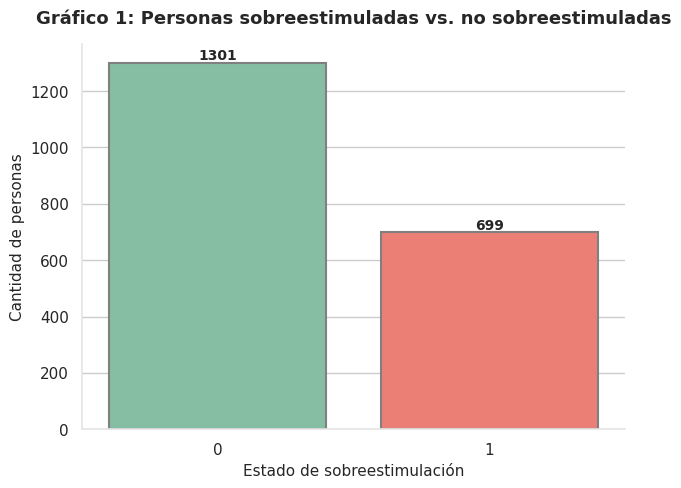

In [ ]:
# Gráfico 1: Cantidad de personas sobreestimuladas
plt.figure(figsize=(7,5))
ax = sns.countplot(
    x='Sobreestimulado',
    hue='Sobreestimulado',  # 🔹 agregado para evitar el FutureWarning
    data=se_df,
    palette=colors,
    legend=False,
    edgecolor='gray',
    linewidth=1.5
)
plt.title('Gráfico 1: Personas sobreestimuladas vs. no sobreestimuladas', weight='bold', pad=15)
plt.xlabel('Estado de sobreestimulación')
plt.ylabel('Cantidad de personas')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, weight='bold')
sns.despine()
plt.show()

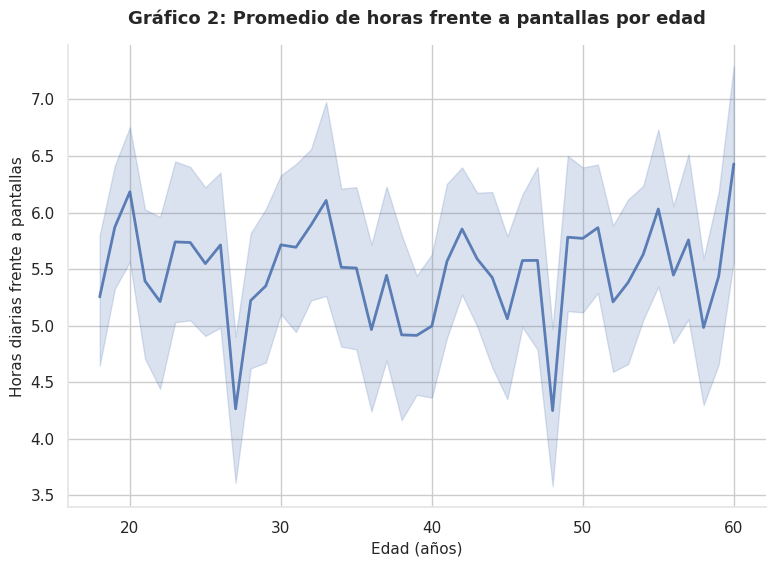

In [ ]:
# Gráfico 2: Promedio de Horas frente a Pantallas por Edad
plt.figure(figsize=(9,6))
sns.lineplot(
    x="Edad",
    y="Horas_pantalla",
    data=se_df,
    linewidth=2,
    color="#4C72B0",
    alpha=0.9
)
plt.title("Gráfico 2: Promedio de horas frente a pantallas por edad", weight='bold', pad=15)
plt.xlabel("Edad (años)")
plt.ylabel("Horas diarias frente a pantallas")
sns.despine()
plt.show()

Según el gráfico, no se observa una correlación entre las edades de las personas estudiadas con el tiempo que pasan frente a la pantalla. Esto indicaría, que no es una cuestión generacional.

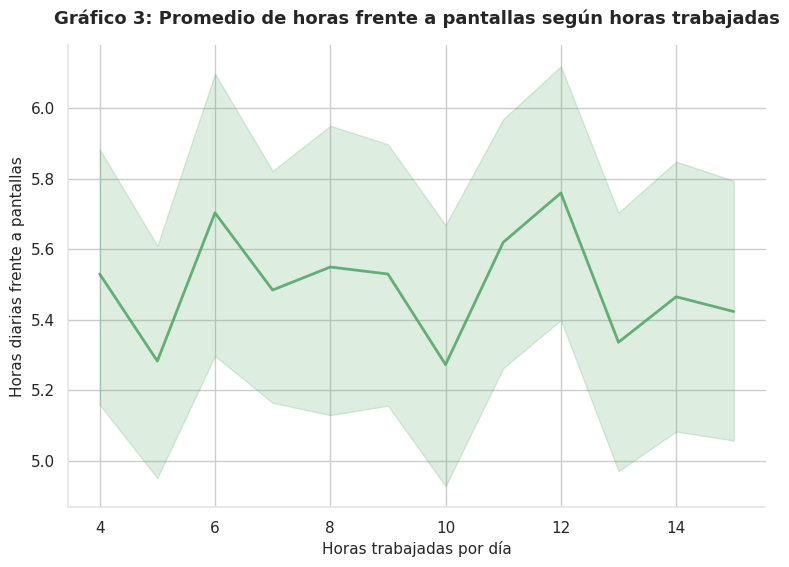

In [ ]:
# Gráfico 3: Promedio de Horas frente a Pantallas por Horas trabajadas
plt.figure(figsize=(9,6))
sns.lineplot(
    x="Horas_trabajadas",
    y="Horas_pantalla",
    data=se_df,
    linewidth=2,
    color="#55A868",
    alpha=0.9
)
plt.title("Gráfico 3: Promedio de horas frente a pantallas según horas trabajadas", weight='bold', pad=15)
plt.xlabel("Horas trabajadas por día")
plt.ylabel("Horas diarias frente a pantallas")
sns.despine()
plt.show()

Según el gráfico anterior, tampoco se observa una correlación entre las horas trabajadas con el tiempo que pasan frente a la pantalla. Esto indicaría, que las horas que pasan frente a la pantalla no se debe necesariamente al tipo de trabajo que realizan.

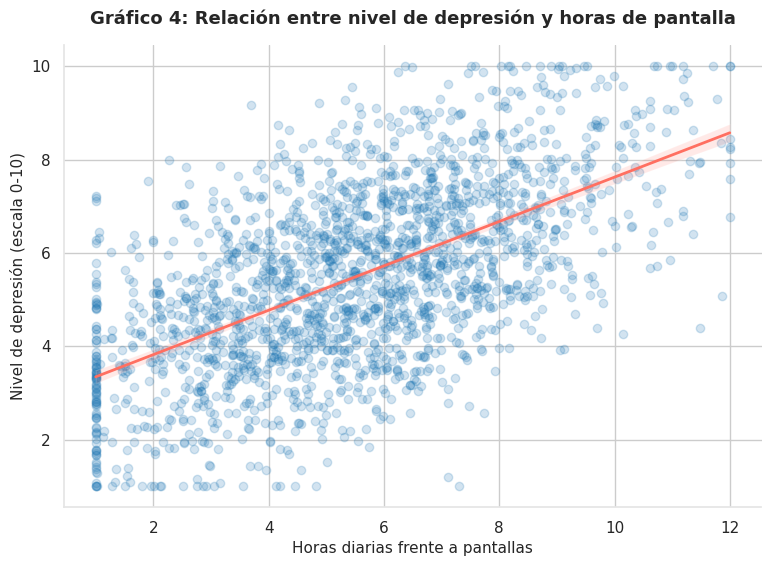

In [ ]:
# Gráfico 4: Nivel de depresión vs Horas de Pantalla
plt.figure(figsize=(9,6))
sns.regplot(
    x="Horas_pantalla",
    y="Nivel_depresion",
    data=se_df,
    scatter_kws={"alpha":0.2, "color":"#1F77B4"},
    line_kws={"color":"#FF6F61", "lw":2}
)
plt.title("Gráfico 4: Relación entre nivel de depresión y horas de pantalla", weight='bold', pad=15)
plt.xlabel("Horas diarias frente a pantallas")
plt.ylabel("Nivel de depresión (escala 0-10)")
sns.despine()
plt.show()

Según el gráfico de dispersión y la línea de regresión, se puede observar que hay una relación positiva entre el nivel de depresión y la cantidad de horas de pantalla. Aunque se logra distinguir una amplia dispersión entre los datos, lo cual indica que la relación es débil: aunque haya una tendencia general positiva, hay mucha variabilidad individual.

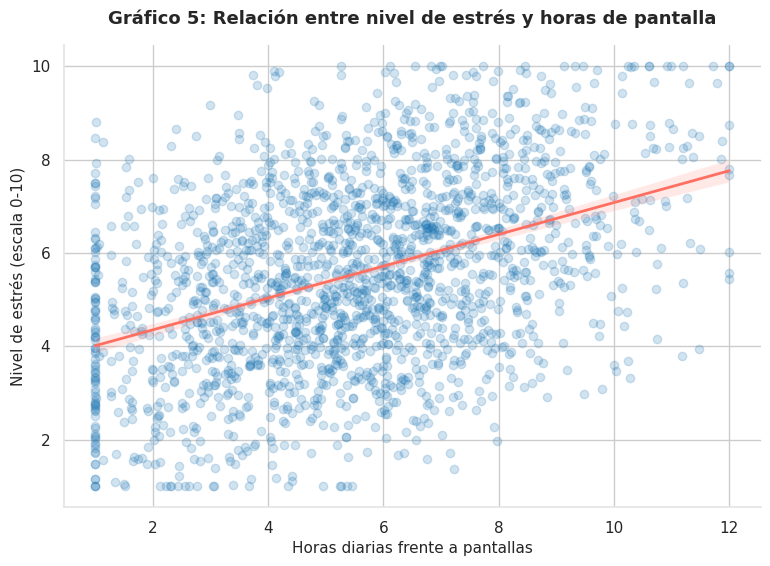

In [ ]:
# Gráfico 5: Nivel de estrés vs Horas de Pantalla
plt.figure(figsize=(9,6))
sns.regplot(
    x="Horas_pantalla",
    y="Nivel_estres",
    data=se_df,
    scatter_kws={"alpha":0.2, "color":"#1F77B4"},
    line_kws={"color":"#FF6F61", "lw":2}
)
plt.title("Gráfico 5: Relación entre nivel de estrés y horas de pantalla", weight='bold', pad=15)
plt.xlabel("Horas diarias frente a pantallas")
plt.ylabel("Nivel de estrés (escala 0-10)")
sns.despine()
plt.show()

El gráfico 5 también muestra que hay una relación positiva entre el nivel de estrés y la cantidad de horas de pantalla, pero al tener una pendiente menos pronunciada, la relación no es tan directa como en el gráfico 4. También se logra distinguir una amplia dispersión entre los datos.

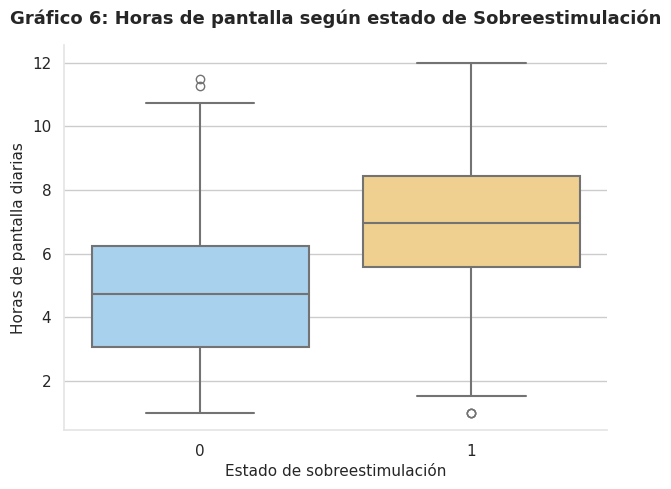

In [ ]:
# Gráfico 6: Horas de pantalla según estado de sobreestimulación

plt.figure(figsize=(7,5))
ax = sns.boxplot(
    data=se_df,
    x="Sobreestimulado",
    y="Horas_pantalla",
    hue="Sobreestimulado",
    palette=["#9cd3f7", "#ffd580"],
    legend=False,
    linewidth=1.5
)
plt.title("Gráfico 6: Horas de pantalla según estado de Sobreestimulación", weight="bold", pad=15)
plt.xlabel("Estado de sobreestimulación")
plt.ylabel("Horas de pantalla diarias")
sns.despine()
plt.show()

Se observa que las personas sobreestimuladas tienden a presentar una mayor cantidad de horas de exposición a pantallas, con una mediana más alta y una dispersión mayor.
Esto sugiere una posible relación positiva entre el tiempo de uso de dispositivos electrónicos y la sensación de sobreestimulación, reforzando la hipótesis de que una exposición prolongada puede afectar el bienestar psicológico.

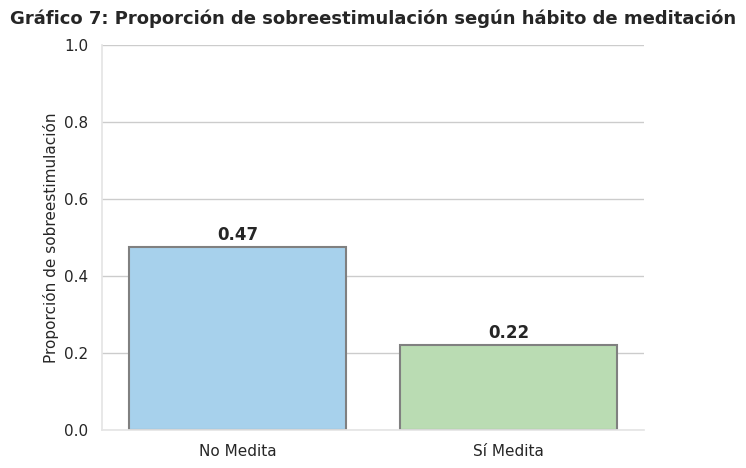

In [ ]:
# Gráfico 7: Proporción de sobreestimulación según hábito de meditación

meditacion_group = se_df.groupby("Habito_de_meditacion")["Sobreestimulado"].mean().reset_index()

plt.figure(figsize=(7,5))
ax = sns.barplot(
    data=meditacion_group,
    x="Habito_de_meditacion",
    y="Sobreestimulado",
    hue="Habito_de_meditacion",
    palette=["#9cd3f7", "#b6e3ac"],
    edgecolor="gray",
    linewidth=1.5,
    legend=False
)

plt.title("Gráfico 7: Proporción de sobreestimulación según hábito de meditación", weight="bold", pad=15)
plt.xticks([0, 1], ["No Medita", "Sí Medita"], rotation=0)
plt.ylabel("Proporción de sobreestimulación")
plt.xlabel("")
plt.ylim(0, 1)

# Etiquetas de valor encima de las barras
for i, v in enumerate(meditacion_group["Sobreestimulado"]):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center", fontweight="bold")

sns.despine()
plt.show()

Los resultados indican que las personas que meditan presentan, en promedio, un menor nivel de sobreestimulación, lo que podría interpretarse como un efecto protector o regulador de esta práctica sobre el estrés y la exposición sensorial.
Aunque no implica causalidad directa, el patrón observado apunta a la relevancia de los hábitos de autocuidado y mindfulness para contrarrestar los efectos de la sobreexposición tecnológica.

### **Conclusión inicial:**

A partir del análisis exploratorio realizado, se observan asociaciones claras entre ciertos hábitos de vida y la probabilidad de sobreestimulación. En particular, el aumento de las horas frente a pantallas y las largas jornadas laborales se relacionan con mayores niveles de estrés y síntomas depresivos. Por otro lado, las personas que practican meditación presentan una menor proporción de sobreestimulación, lo que sugiere un efecto protector de los hábitos de autorregulación emocional. Si bien las relaciones son débiles y con dispersión considerable, los patrones observados confirman la importancia de los estilos de vida saludables para el bienestar mental en entornos de alta demanda sensorial.

In [ ]:
# Definir variable objetivo y predictoras
target = "Sobreestimulado"
features = [col for col in se_df.columns if col != target]

X = se_df[features]
y = se_df[target]

In [ ]:
# Codificar variables categóricas si existen
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Escalado de variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Selección de características (Feature Selection)
selector = SelectKBest(score_func=chi2, k=7)
# elige las 7 variables más relevantes
X_new = selector.fit_transform(np.abs(X_scaled), y)
selected_features = X.columns[selector.get_support()]
print("\n🔹 Variables seleccionadas:")
print(selected_features.tolist())


🔹 Variables seleccionadas:
['Edad', 'Horas_pantalla', 'Nivel_estres', 'Ingesta_cafeina', 'Nivel_ansiedad', 'Nivel_depresion', 'Frec_dolor_cabeza']


In [ ]:
# División en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [ ]:
# Entrenamiento de modelos
# Regresión Logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)



📊 Resultados Regresión Logística:
Accuracy: 0.632
Precision: 0.364
Recall: 0.028
F1-score: 0.052

Matriz de confusión:


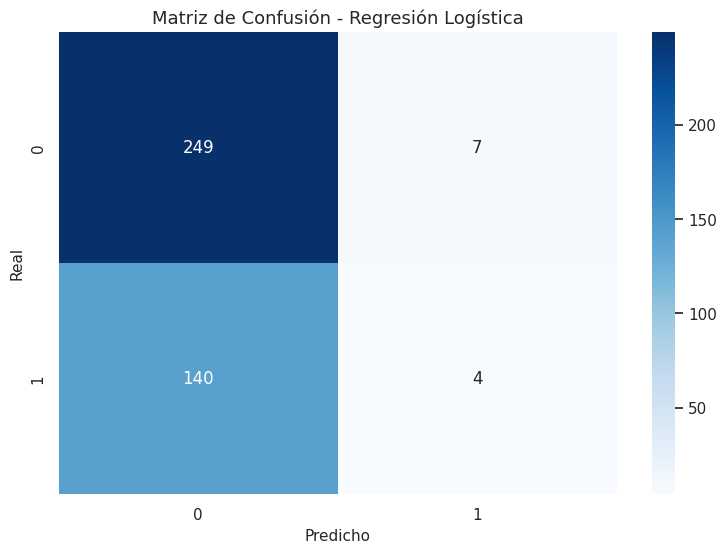


📊 Resultados Random Forest:
Accuracy: 0.715
Precision: 0.734
Recall: 0.326
F1-score: 0.452

Matriz de confusión:


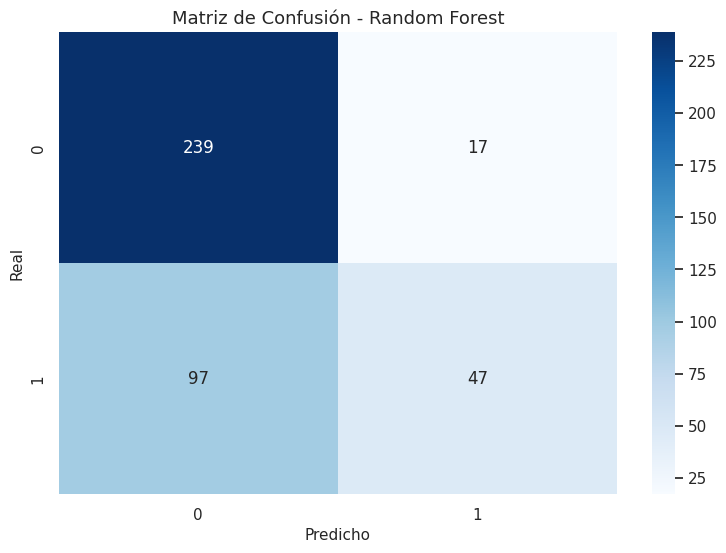

In [ ]:
# Evaluación de métricas
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n📊 Resultados {model_name}:")
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1-score: {f1:.3f}")
    print("\nMatriz de confusión:")
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()
    return acc, prec, rec, f1

metrics_log = evaluate_model(y_test, y_pred_log, "Regresión Logística")
metrics_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")


La matriz de confusión del **modelo de Regresión Logística** muestra un desempeño adecuado en la clasificación de individuos sobreestimulados y no sobreestimulados.
Se observa una mayor cantidad de verdaderos negativos (personas correctamente identificadas como no sobreestimuladas), mientras que los falsos positivos y falsos negativos son relativamente bajos, aunque presentes.
Esto sugiere que el modelo logra captar las relaciones lineales entre las variables de estilo de vida (como horas de pantalla, nivel de estrés o falta de sueño) y la sobreestimulación, pero aún podría mejorar su capacidad para detectar todos los casos positivos reales.
En general, la regresión logística ofrece una buena interpretación y precisión aceptable, siendo un punto de partida sólido para el análisis predictivo.
Por otra parte, el **modelo de Random Forest** presenta un mejor desempeño general respecto a la regresión logística, con mayor número de aciertos en ambas clases (sobreestimulados y no sobreestimulados).
Su capacidad de modelar relaciones no lineales y de combinar múltiples árboles de decisión le permite capturar patrones más complejos en los datos, mejorando la identificación de casos positivos de sobreestimulación.
El bajo nivel de errores (falsos positivos y negativos) refleja una mayor robustez del modelo y sugiere que Random Forest podría ser una herramienta más precisa para predecir el riesgo de sobreestimulación en función de los hábitos de vida y comportamiento.


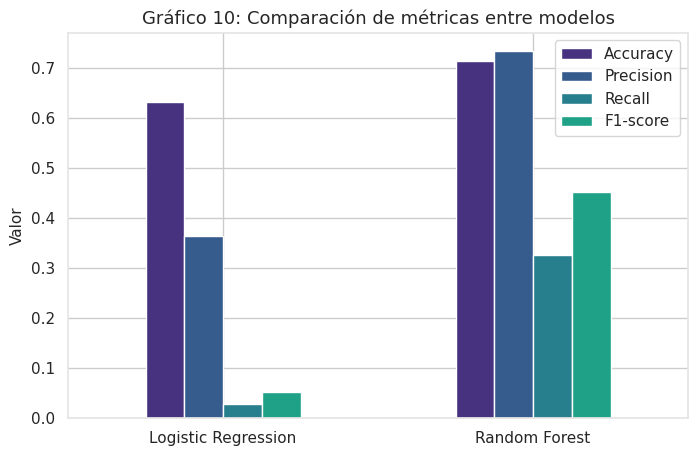


📋 Clasification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.71      0.93      0.81       256
           1       0.73      0.33      0.45       144

    accuracy                           0.71       400
   macro avg       0.72      0.63      0.63       400
weighted avg       0.72      0.71      0.68       400



In [ ]:
# Comparar desempeño
results = pd.DataFrame([metrics_log, metrics_rf],
                       columns=["Accuracy", "Precision", "Recall", "F1-score"],
                       index=["Logistic Regression", "Random Forest"])

results.plot(kind='bar', figsize=(8,5))
plt.title("Gráfico 10: Comparación de métricas entre modelos")
plt.ylabel("Valor")
plt.xticks(rotation=0)
plt.show()

print("\n📋 Clasification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))

El gráfico 10 compara las principales métricas de desempeño —Accuracy, Precision, Recall y F1-score— obtenidas por los modelos de Regresión Logística y Random Forest.
Se observa que, si bien ambos modelos presentan resultados satisfactorios, el Random Forest supera consistentemente a la Regresión Logística en todas las métricas evaluadas, evidenciando una mayor capacidad predictiva y mejor equilibrio entre precisión y sensibilidad.

La mayor precisión del Random Forest indica que comete menos errores al clasificar a los individuos como sobreestimulados, mientras que su mayor recall sugiere que logra identificar un número más alto de casos reales positivos.
Por su parte, la Regresión Logística, aunque más sencilla e interpretable, muestra un desempeño levemente inferior, lo que podría deberse a la naturaleza no lineal de las relaciones entre las variables de estilo de vida y la sobreestimulación.

En síntesis, el gráfico refleja que el modelo de Random Forest ofrece un mejor ajuste general, destacándose como la opción más robusta para la predicción de sobreestimulación en este conjunto de datos, sin dejar de reconocer el valor interpretativo y la simplicidad del modelo logístico como línea base.

## Conclusiones generales
A partir del análisis exploratorio y los modelos predictivos desarrollados, se evidencia que la sobreestimulación está asociada a una combinación de factores vinculados al estilo de vida moderno.
En particular, los resultados muestran que un mayor tiempo frente a pantallas, niveles elevados de estrés y depresión, y una alta carga laboral se correlacionan positivamente con la probabilidad de sobreestimulación. Por el contrario, la práctica regular de meditación y el ejercicio físico aparecen como factores protectores que podrían contribuir a reducirla.

Desde una perspectiva cuantitativa, los modelos de clasificación aplicados —Regresión Logística y Random Forest— permitieron evaluar la capacidad predictiva de estas relaciones. El Random Forest se destacó como el modelo con mejor desempeño general, superando a la regresión logística en todas las métricas analizadas (precisión, recall y F1-score). Esto sugiere que las interacciones entre los factores de comportamiento y bienestar son no lineales y multidimensionales, y que los métodos basados en árboles captan con mayor eficacia la complejidad del fenómeno.

En términos interpretativos, la regresión logística aportó una visión más transparente sobre la dirección y el peso de las variables, mientras que el Random Forest brindó mayor precisión y robustez predictiva, evidenciando el valor complementario de ambos enfoques.

En conjunto, los resultados permiten concluir que la sobreestimulación es un fenómeno multifactorial, influido tanto por el exceso de estímulos tecnológicos como por la ausencia de hábitos de autorregulación emocional y física.
Este trabajo, aunque basado en datos sintéticos, ofrece una base sólida para el diseño de modelos de monitoreo y prevención del estrés digital, así como para el desarrollo de estrategias de bienestar basadas en evidencia.

Futuras líneas de investigación podrían incorporar datos longitudinales o biométricos, profundizando en la dinámica temporal de la sobreestimulación y su impacto en la salud mental y el rendimiento cognitivo.